In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from sklearn.linear_model import LinearRegression
import glob
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [2]:
flux_files = glob.glob('../outputs/files/chemical_data_manuscript/*.csv')

In [3]:
molec_dict_corresp = {}
molec_dict_corresp['Paracétamol'] = 'Paracétamol'
molec_dict_corresp['PMMoV (Pepper mild mottle virus)'] = 'PMMoV'
molec_dict_corresp['Oxazépam'] = 'Oxazépam'
molec_dict_corresp['Aténolol'] = 'Aténolol'
molec_dict_corresp['Ofloxacine'] = 'Ofloxacine'
molec_dict_corresp['Sotalol'] = 'Sotalol'
molec_dict_corresp['Diclofénac'] = 'Diclofénac'
molec_dict_corresp['Propranolol'] = 'Propranolol'
molec_dict_corresp['Ciprofloxacine'] = 'Ciprofloxacine'
molec_dict_corresp['Kétoprofène'] = 'Kétoprofène'
molec_dict_corresp['Naproxène'] = 'Naproxène'
molec_dict_corresp['Sulfaméthoxazole'] = 'Sulfaméthoxazole'
molec_dict_corresp['Carbamazépine'] = 'Carbamazépine'
molec_dict_corresp['Erythromycine A'] = 'Erythromycine'
molec_dict_corresp['Ibuprofène'] = 'Ibuprofène'
molec_dict_corresp['Triméthoprime'] = 'Triméthoprime'

In [4]:
en_fr_labels_dict = {}

en_fr_labels_dict['Paracétamol'] = 'Paracetamol'
en_fr_labels_dict['Aténolol'] = 'Atenolol'
en_fr_labels_dict['Carbamazépine'] = 'Carbamazepine'
en_fr_labels_dict['Ciprofloxacine'] = 'Ciprofloxacin'
en_fr_labels_dict['Diclofénac'] = 'Diclofenac'
en_fr_labels_dict['Ibuprofène'] = 'Ibuprofen'
en_fr_labels_dict['Kétoprofène'] = 'Ketoprofen'
en_fr_labels_dict['Naproxène'] = 'Naproxen'
en_fr_labels_dict['Ofloxacine'] = 'Ofloxacin'
en_fr_labels_dict['Oxazépam'] = 'Oxazepam'
en_fr_labels_dict['Propranolol'] = 'Propranolol'
en_fr_labels_dict['Sotalol'] = 'Sotalol'
en_fr_labels_dict['Sulfaméthoxazole'] = 'Sulfamethoxazole'
en_fr_labels_dict['Triméthoprime'] = 'Trimethoprim'
en_fr_labels_dict['Erythromycine'] = 'Erythromycin'

In [5]:
filtered_flux_files = sorted(flux_files)

In [6]:
colorz = ['dodgerblue', 'red', 'darkorange', 'forestgreen', 'blueviolet', 'silver', 'navy', 'teal',
         'gold', 'lightseagreen', 'limegreen', 'fuchsia',
         'deepskyblue', 'mediumturquoise', 'mediumorchid', 'coral', 'olive', 'black']

In [7]:
file_color_dict = {}
for fileindex, file in enumerate(filtered_flux_files):
    this_molecule = file.split('.csv')[0].split('/')[-1].split('_NUTS_volume')[0]
    this_molecule = molec_dict_corresp[this_molecule]
    this_molecule = en_fr_labels_dict[this_molecule]
    file_color_dict[this_molecule] = colorz[fileindex]

In [8]:
hatches = ['/', '\\', '|', '-', '+', '/', '\\', '|', '-', '+', '/', '\\', '|', '-', '+']
file_hatch_dict = {}
for keyindex, key in enumerate(list(file_color_dict.keys())):
    file_hatch_dict[key] = hatches[keyindex]

In [9]:
from matplotlib.ticker import ScalarFormatter

class CustomScalarFormatter(ScalarFormatter):
    def _set_format(self):
        self.format = "%.1f"

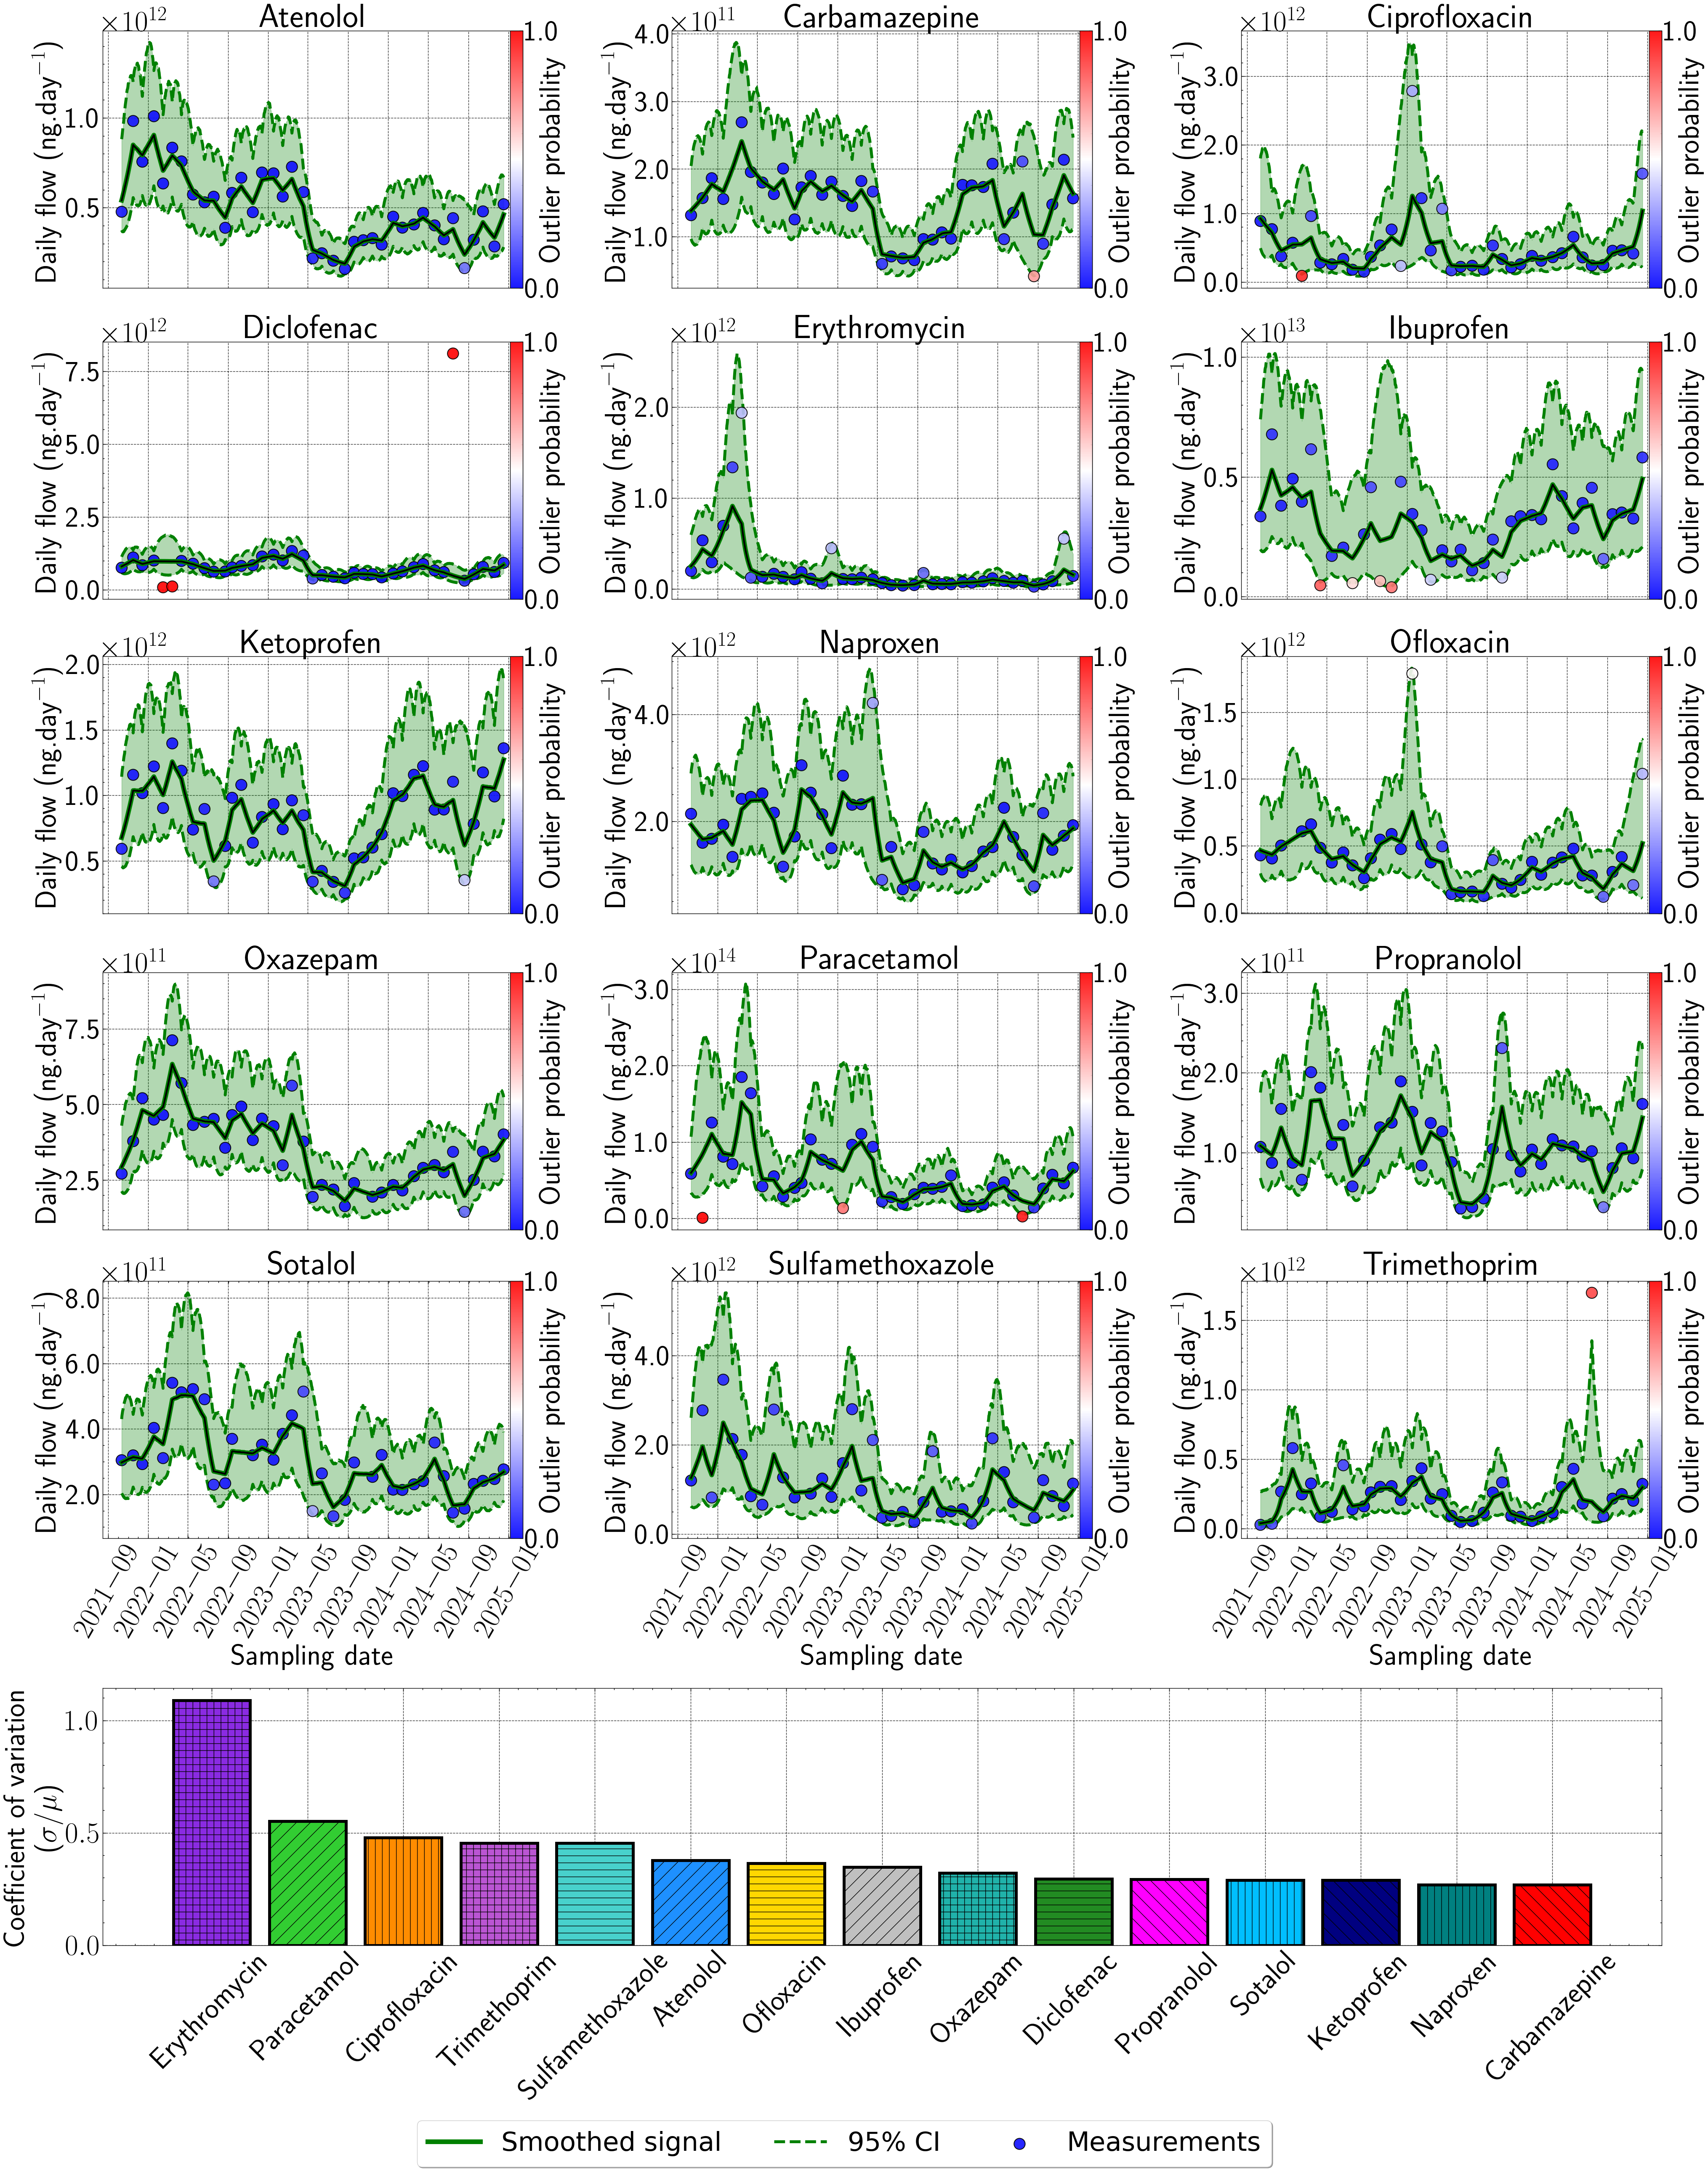

In [10]:
molec_mean_lin = {}
molec_std_lin = {}
molec_cd_lin = {}

with plt.style.context(['science', 'notebook', 'grid']):

    ratio_factor = 1.25#0.875
    KEY_SIZE = int(40 * ratio_factor)
    LABEL_SIZE = int(40 * ratio_factor)
    TICK_SIZE = int(40 * ratio_factor)
    TITLE_SIZE = int(46 * ratio_factor)
    LEGEND_SIZE = int(36 * ratio_factor)
    DATES_SIZE = 18
    #figsize = (60, 32) #figsize = (32, 10)
    #figsize = (60, 60) 
    #figsize = (40, 40)
    figsize = (40, 50)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    #fig.subplots_adjust(wspace=0.3)
    
    ax_dict = fig.subplot_mosaic(
        """
        ABC
        DEF
        GHI
        JKL
        MNO
        SSS
        """,
        gridspec_kw={'wspace': 0.05, 'hspace':0.05}
    )

    keys_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

    # Formatter pour 3 chiffres après la virgule
    formatter = FuncFormatter(lambda y, _: f'{y:.1f}')
    
    for fileindex, file in enumerate(filtered_flux_files):
        this_key = keys_list[fileindex]        
        this_sub_data = pd.read_csv(file, sep=";")
        this_sub_data.dateStart = pd.to_datetime(this_sub_data.dateStart)
        this_sub_data = this_sub_data.loc[this_sub_data.dateStart>='2021-10-12']
        this_sub_data.muX = 10**(this_sub_data.muX.values)
        this_sub_data.ICL = 10**(this_sub_data.ICL.values)
        this_sub_data.ICU = 10**(this_sub_data.ICU.values)
        this_sub_data.obs = 10**(this_sub_data.obs.values)
        this_molecule = file.split('.csv')[0].split('/')[-1].split('_NUTS_volume')[0]
        this_molecule = molec_dict_corresp[this_molecule]
        this_molecule = en_fr_labels_dict[this_molecule]
    
        ax_dict[this_key].plot(this_sub_data.dateStart.values, this_sub_data.muX.values, label='Smoothed signal', color='green', linewidth=8, zorder=3)
        ax_dict[this_key].plot(this_sub_data.dateStart.values, this_sub_data.muX.values, color='black', linewidth=3, zorder=3)
        
        ax_dict[this_key].plot(this_sub_data.dateStart.values, this_sub_data.ICL.values, label='95% CI', linestyle='--', color='green', linewidth=5, zorder=1)
        ax_dict[this_key].plot(this_sub_data.dateStart.values, this_sub_data.ICU.values, linestyle='--', color='green', linewidth=5, zorder=1)
        
        ax_dict[this_key].fill_between(this_sub_data.dateStart.values, this_sub_data.ICL.values, this_sub_data.ICU.values, alpha=.3, color='green')
    
        
        scatter_points = ax_dict[this_key].scatter(this_sub_data.dateStart.values, this_sub_data.obs.values, label='Measurements', 
                             c=this_sub_data.pout.values,
                             cmap='bwr', edgecolor='black', s=360, zorder=1,
                             linewidths=1.5, alpha=0.9, vmin=0, vmax=1)
    
        
        ax_dict[this_key].set_ylabel("Daily flow (ng.day$^{-1}$)")
        ax_dict[this_key].set_xlabel("Sampling date")
        ax_dict[this_key].tick_params(axis='x', labelsize=TICK_SIZE, rotation=60)
        ax_dict[this_key].tick_params(axis='y', labelsize=TICK_SIZE)
        ax_dict[this_key].grid(linewidth=1, color='black', alpha=0.8)
        ax_dict[this_key].set_title(this_molecule, size=TITLE_SIZE)
        formatter = CustomScalarFormatter(useMathText=True)
        formatter.set_powerlimits((0, 0))
        ax_dict[this_key].yaxis.set_major_formatter(formatter)

    
        ### Outlier probability legend:
        cmin, cmax = 0.0, 1.0 
        axins1 = inset_axes(ax_dict[this_key], width='3%', height='100%', loc='right', borderpad=0)
        axins1.grid(False)
        cbar = fig.colorbar(scatter_points, cax=axins1, orientation='vertical')
        
        # Setting tick limits:
        cbar.set_ticks([cmin, cmax])
        cbar.ax.yaxis.set_major_locator(ticker.FixedLocator([cmin, cmax]))
        
        # Standardizing the float format displayed:
        decimal_places = 1
        cbar.ax.set_yticklabels([f"{cmin:.{decimal_places}f}", f"{cmax:.{decimal_places}f}"], fontsize=TICK_SIZE)
    
        # Placing the label at the right spot:
        cbar.ax.set_ylabel('Outlier probability', size=TICK_SIZE, labelpad=-35)

        #molec_dispersion[this_molecule] = np.std(this_sub_data.muX.values)
        molec_mean_lin[this_molecule] = np.mean(this_sub_data.muX.values)
        molec_std_lin[this_molecule] = np.std(this_sub_data.muX.values)
        molec_cd_lin[this_molecule] = molec_std_lin[this_molecule]/molec_mean_lin[this_molecule]

    #ax_dict['R'].set_visible(False)
    #ax_dict['T'].set_visible(False)

    sorted_molec_cd_lin = dict(sorted(molec_cd_lin.items(), key=lambda x: x[1], reverse=True))
    ordered_colors = []
    for key in list(sorted_molec_cd_lin.keys()):
        ordered_colors.append(file_color_dict[key])

    ordered_hatches = []
    for key in list(sorted_molec_cd_lin.keys()):
        ordered_hatches.append(file_hatch_dict[key])
    
    ax_dict['S'].bar(list(sorted_molec_cd_lin.keys()), list(sorted_molec_cd_lin.values()),
                     color=ordered_colors, hatch=ordered_hatches, edgecolor='black', linewidth=5)

    ax_dict['S'].set_ylabel("Coefficient of variation \n($\sigma$/$\mu$)")
    #ax_dict[this_key].set_xlabel("Sampling date")
    ax_dict['S'].tick_params(axis='x', labelsize=TICK_SIZE, rotation=45)
    ax_dict['S'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['S'].grid(linewidth=1, color='black', alpha=0.8)
    #ax_dict[this_key].set_title(this_molecule, size=TITLE_SIZE)


    for this_key in ['A', 'D', 'G', 'J']:
        ax_dict[this_key].tick_params(axis='x', which='both', bottom=False, top=False, 
                                labelbottom=False, labeltop=False)
        ax_dict[this_key].set_xticks([])
        ax_dict[this_key].set_xticklabels([])
        ax_dict[this_key].set_xlabel('')
        ax_dict[this_key].sharex(ax_dict['M'])

    for this_key in ['B', 'E', 'H', 'K']:
        ax_dict[this_key].tick_params(axis='x', which='both', bottom=False, top=False, 
                                labelbottom=False, labeltop=False)
        ax_dict[this_key].set_xticks([])
        ax_dict[this_key].set_xticklabels([])
        ax_dict[this_key].set_xlabel('')
        ax_dict[this_key].sharex(ax_dict['N'])

    for this_key in ['C', 'F', 'I', 'L']:
        ax_dict[this_key].tick_params(axis='x', which='both', bottom=False, top=False, 
                                labelbottom=False, labeltop=False)
        ax_dict[this_key].set_xticks([])
        ax_dict[this_key].set_xticklabels([])
        ax_dict[this_key].set_xlabel('')
        ax_dict[this_key].sharex(ax_dict['O'])
    
    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict[this_key].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=5)
    plt.savefig('../outputs/figs/2025-12-18_Donnees_Chimie_Flux_Lin.pdf', bbox_inches='tight')
    plt.savefig('../outputs/figs/2025-12-18_Donnees_Chimie_Flux_Lin.jpg', bbox_inches='tight')


In [11]:
molecules_factors = {}
molecules_factors['Aténolol'] = 1.4 # Gao et al., 2021
molecules_factors['Propranolol'] = 12.4 # Alder et al., 2010
molecules_factors['Sotalol'] = 2.3 # Alder et al., 2010
molecules_factors['Oxazépam'] = 1.6 # Quireyns et al., 2025a
molecules_factors['Carbamazépine'] = 7.1 # Kasprzyk-Hordern et al., 2021 
molecules_factors['Ciprofloxacine'] = 2.0 # Holton et al., 2023

molecules_factors['Ofloxacine'] = 1.3 # Holton et al., 2023
molecules_factors['Triméthoprime'] = 1.6 # Holton et al., 2023
molecules_factors['Sulfaméthoxazole'] = 6.6 # Holton et al., 2023
molecules_factors["Paracétamol"] = 3.5 # Kannan et al., 2023
molecules_factors['Ibuprofène'] = 9.4 # Kannan et al., 2023
molecules_factors['Diclofénac'] = 17.2 # Kannan et al., 2023
molecules_factors['Kétoprofène'] = 17.6 # Kannan et al., 2023
molecules_factors['Naproxène'] = 1.70 # Kannan et al., 2023

In [12]:
# no correction factor used for Erythromycine:
filtered_flux_files.remove('../outputs/files/chemical_data_manuscript/Erythromycine A.csv')

In [13]:
df_pop = pd.read_csv("../outputs/files/ww_estimator/df_SEC_final.csv", sep=";")

In [14]:
df_pop.dateStart = pd.to_datetime(df_pop.dateStart)

In [15]:
mean_consumed_flux_per_hab = {}
std_consumed_flux_per_hab = {}
cv_flux_per_hab = {}

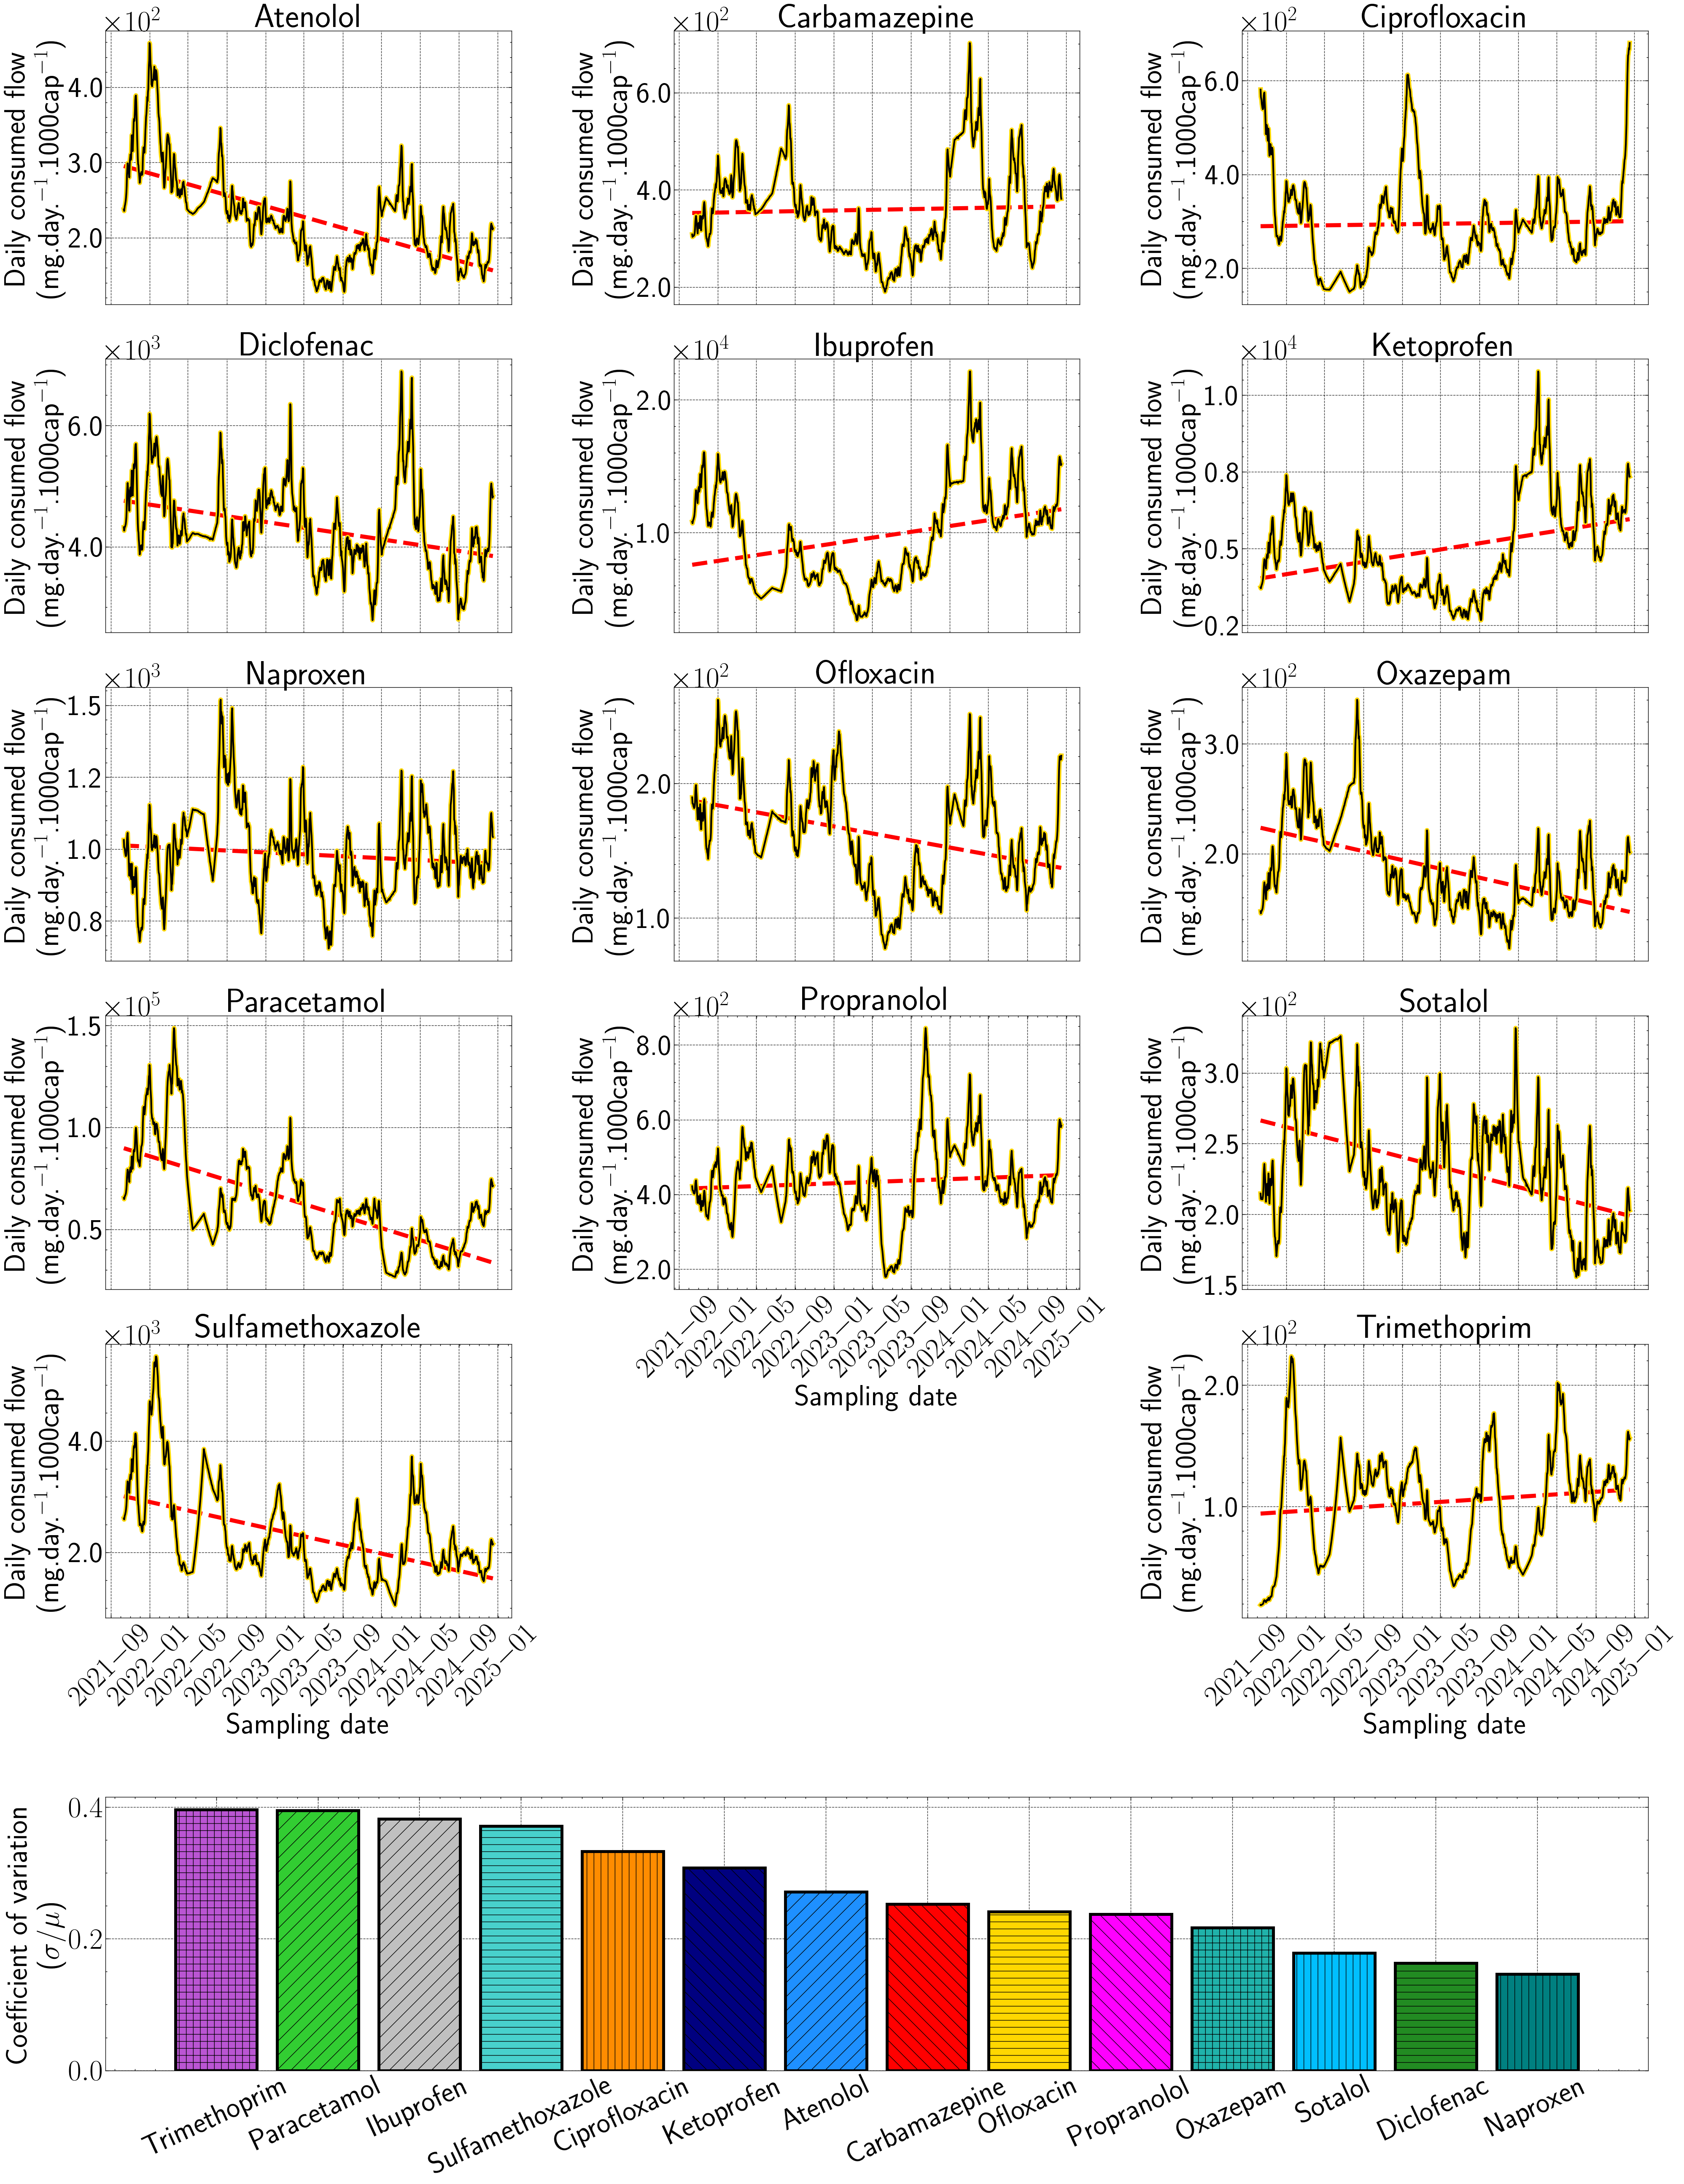

In [16]:
molec_dispersion = {}

with plt.style.context(['science', 'notebook', 'grid']):

    ratio_factor = 1.25
    KEY_SIZE = int(40 * ratio_factor)
    LABEL_SIZE = int(40 * ratio_factor)
    TICK_SIZE = int(40 * ratio_factor)
    TITLE_SIZE = int(46 * ratio_factor)
    LEGEND_SIZE = int(36 * ratio_factor)
    DATES_SIZE = 18
    figsize = (40*1.18, 50*1.18)
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize)
    ax_dict = fig.subplot_mosaic(
        """
        ABC
        DEF
        GHI
        JKL
        MON
        QQQ
        """
    )
    fig.subplots_adjust(wspace=0.40, hspace=0.20)
    
    keys_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'R', 'S', 'T']
    
    for fileindex, file in enumerate(filtered_flux_files):
        this_key = keys_list[fileindex]        
        this_sub_data = pd.read_csv(file, sep=";")
        this_sub_data.dateStart = pd.to_datetime(this_sub_data.dateStart)
        this_sub_data = this_sub_data.loc[this_sub_data.dateStart>='2021-10-12']
        this_molecule = file.split('.csv')[0].split('/')[-1].split('_')[0]
        this_molecule = molec_dict_corresp[this_molecule]
        sub_df_pop = df_pop.loc[df_pop.dateStart.isin(this_sub_data.dateStart)]
        pop_vector = sub_df_pop['Nt_hat_4'].values

        if this_molecule not in list(molecules_factors.keys()):
            continue
        else:

            this_smoothed_signal = molecules_factors[this_molecule]*10**(this_sub_data.muX.values)*1e-9
            this_smoothed_signal = 1000 * this_smoothed_signal / pop_vector
            this_smoothed_signal = 1000 * this_smoothed_signal
            
            ax_dict[this_key].plot(this_sub_data.dateStart.values, this_smoothed_signal, label='$X^*_{t_{opt}}$', color='gold', linewidth=8, zorder=3)
            ax_dict[this_key].plot(this_sub_data.dateStart.values, this_smoothed_signal, color='black', linewidth=3, zorder=3)
                                
            ax_dict[this_key].set_ylabel("Daily consumed flow\n (mg.day.$^{-1}$.1000cap$^{-1}$)")
            ax_dict[this_key].set_xlabel("Sampling date")
            ax_dict[this_key].tick_params(axis='x', labelsize=TICK_SIZE, rotation=45)
            ax_dict[this_key].tick_params(axis='y', labelsize=TICK_SIZE)
            ax_dict[this_key].grid(linewidth=1, color='black', alpha=0.8)
            ax_dict[this_key].set_title(en_fr_labels_dict[this_molecule], size=TITLE_SIZE)
            formatter = CustomScalarFormatter(useMathText=True)
            formatter.set_powerlimits((0, 0))
            ax_dict[this_key].yaxis.set_major_formatter(formatter)
            
            mean_consumed_flux_per_hab[this_molecule] = np.mean(this_smoothed_signal) 
            std_consumed_flux_per_hab[this_molecule] = np.std(this_smoothed_signal)
            cv_flux_per_hab[en_fr_labels_dict[this_molecule]] = std_consumed_flux_per_hab[this_molecule] / mean_consumed_flux_per_hab[this_molecule]

            lr = LinearRegression()
            lr.fit(np.arange(this_smoothed_signal.shape[0]).reshape(-1,1), this_smoothed_signal)
            y_pred = lr.predict(np.arange(this_smoothed_signal.shape[0]).reshape(-1,1))

            ax_dict[this_key].plot(this_sub_data.dateStart.values, y_pred, linewidth=7, color='red', linestyle='--')

    ax_dict['O'].set_visible(False)

    sorted_cv_flux_per_hab = dict(sorted(cv_flux_per_hab.items(), key=lambda x: x[1], reverse=True))
    ordered_colors = []
    for key in list(sorted_cv_flux_per_hab.keys()):
        ordered_colors.append(file_color_dict[key])
    ordered_hatches = []
    for key in list(sorted_cv_flux_per_hab.keys()):
        ordered_hatches.append(file_hatch_dict[key])
    
    ax_dict['Q'].bar(list(sorted_cv_flux_per_hab.keys()), list(sorted_cv_flux_per_hab.values()),
                     color=ordered_colors, hatch=ordered_hatches, edgecolor='black', linewidth=5)

    ax_dict['Q'].set_ylabel("Coefficient of variation \n ($\sigma$/$\mu$)")
    ax_dict['Q'].tick_params(axis='x', labelsize=TICK_SIZE, rotation=25)
    ax_dict['Q'].tick_params(axis='y', labelsize=TICK_SIZE)
    ax_dict['Q'].grid(linewidth=1, color='black', alpha=0.8)

    for this_key in ['A', 'D', 'G', 'J']:
        ax_dict[this_key].tick_params(axis='x', which='both', bottom=False, top=False, 
                                labelbottom=False, labeltop=False)
        ax_dict[this_key].set_xticks([])
        ax_dict[this_key].set_xticklabels([])
        ax_dict[this_key].set_xlabel('')
        ax_dict[this_key].sharex(ax_dict['M'])

    for this_key in ['B', 'E', 'H']:
        ax_dict[this_key].tick_params(axis='x', which='both', bottom=False, top=False, 
                                labelbottom=False, labeltop=False)
        ax_dict[this_key].set_xticks([])
        ax_dict[this_key].set_xticklabels([])
        ax_dict[this_key].set_xlabel('')
        ax_dict[this_key].sharex(ax_dict['K'])

    for this_key in ['C', 'F', 'I', 'L']:
        ax_dict[this_key].tick_params(axis='x', which='both', bottom=False, top=False, 
                                labelbottom=False, labeltop=False)
        ax_dict[this_key].set_xticks([])
        ax_dict[this_key].set_xticklabels([])
        ax_dict[this_key].set_xlabel('')
        ax_dict[this_key].sharex(ax_dict['N'])

    pos_J = ax_dict['J'].get_position()
    pos_L = ax_dict['L'].get_position()
    pos_K = ax_dict['K'].get_position()
    pos_M = ax_dict['M'].get_position()
    pos_N = ax_dict['N'].get_position()
    pos_Q = ax_dict['Q'].get_position()
    
    offset = 0.0
    ax_dict['M'].set_position([pos_J.x0, pos_M.y0 + offset, pos_M.width, pos_M.height])
    ax_dict['N'].set_position([pos_L.x0, pos_N.y0 + offset, pos_N.width, pos_N.height])  

    offset = -0.05
    ax_dict['Q'].set_position([pos_Q.x0, pos_Q.y0 + offset, pos_Q.width, pos_Q.height])

    # Main legend
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict[this_key].get_legend_handles_labels()
    plt.savefig('../outputs/figs/2025-12-18_Donnees_Flux_Consomme_par_hab.pdf', bbox_inches='tight')
    plt.savefig('../outputs/figs/2025-12-18_Donnees_Flux_Consomme_par_hab.jpg', bbox_inches='tight')
    

# Analyse des tendances pour comparaison avec Open Medic : à partir de 2022 à cause de certaines valeurs potentiellement aberrantes en 2021 (ex de la Ciprofloxacine)

In [16]:
molec_df_dict = {}
    
for fileindex, file in enumerate(filtered_flux_files):
    this_key = keys_list[fileindex]        
    this_sub_data = pd.read_csv(file, sep=";")
    this_sub_data.dateStart = pd.to_datetime(this_sub_data.dateStart)
    this_sub_data = this_sub_data.loc[this_sub_data.dateStart>='2021-10-12']
    this_molecule = file.split('.csv')[0].split('/')[-1].split('_')[0]
    this_molecule = molec_dict_corresp[this_molecule]

    if this_molecule not in list(molecules_factors.keys()):
        continue
    else:

        this_smoothed_signal = molecules_factors[this_molecule]*10**(this_sub_data.muX.values)*1e-9
        this_smoothed_signal = 1000 * this_smoothed_signal
        this_sub_data['this_smoothed_signal'] = this_smoothed_signal
        molec_df_dict[this_molecule] = this_sub_data

In [17]:
temp_df = molec_df_dict['Ibuprofène']
temp_df['year'] = temp_df.dateStart.dt.year
temp_df.year.unique()

array([2021, 2022, 2023, 2024], dtype=int32)

In [18]:
# open medict data for each molecule
# format: [2022, 2023, 2024] annual prescriptions

open_medict = {}
open_medict['Paracétamol'] = [660605.60632, 633146.58038, 633133.3255]
open_medict['Aténolol'] = [1587.0058, 1510.1955, 1297.221]
open_medict['Carbamazépine'] = [3150.181, 3052.312, 3021.343]
open_medict['Ciprofloxacine'] = [1382.95856, 1454.748525, 1454.240525]
open_medict['Diclofénac'] = [4448.98975, 4451.07607, 3941.64743]
open_medict['Ibuprofène'] = [17719.6522, 18582.5046, 19016.351]
open_medict['Kétoprofène'] = [3509.9766, 3883.6726, 4059.5734]
open_medict['Naproxène'] = [9215.98785, 7191.34852, 8187.57489]
open_medict['Ofloxacine'] = [618.525005, 522.456925, 385.033775]
open_medict['Oxazépam'] = [756.834, 763.979, 783.1883]
open_medict['Propranolol'] = [1543.41525, 1499.63095, 1492.1173]
open_medict['Sotalol'] = [981.0168, 945.3024, 933.936]
open_medict['Sulfaméthoxazole'] = [3351.228, 3678.436, 3816.768]
open_medict['Triméthoprime'] = [673.7745, 739.2377, 792.8915]

for key in list(open_medict.keys()):
    open_medict[key] = np.array(open_medict[key])

In [19]:
pop_idf = 12.27e6

In [20]:
siaap_dict_pop_norm_by_year = {}

for fileindex, file in enumerate(filtered_flux_files):
    this_key = keys_list[fileindex]        
    this_sub_data = pd.read_csv(file, sep=";")
    this_sub_data.dateStart = pd.to_datetime(this_sub_data.dateStart)
    this_sub_data = this_sub_data.loc[this_sub_data.dateStart>='2022-01-01']


    this_sub_data['year'] = this_sub_data.dateStart.dt.year
    
    this_molecule = file.split('.csv')[0].split('/')[-1].split('_')[0]
    this_molecule = molec_dict_corresp[this_molecule]
    sub_df_pop = df_pop.loc[df_pop.dateStart.isin(this_sub_data.dateStart)]
    pop_vector = sub_df_pop['Nt_hat_4'].values

    if this_molecule not in list(molecules_factors.keys()):
        continue
    else:
        those_values = []
        
        this_smoothed_signal = molecules_factors[this_molecule]*10**(this_sub_data.muX.values)*1e-9
        this_smoothed_signal = 1000 * this_smoothed_signal / pop_vector
        this_smoothed_signal = 1000 * this_smoothed_signal
        this_sub_data['avg_normalized_consumption'] = this_smoothed_signal
        
        for year in [2022, 2023, 2024]:
            temp = this_sub_data.loc[this_sub_data.year==year]
            this_sum = temp.avg_normalized_consumption.sum()

            # account for the fact that theyear 2024 is incomplete
            if year==2024:
                this_sum = this_sum / 0.96
            
            those_values.append(this_sum)

        siaap_dict_pop_norm_by_year[this_molecule] = np.array(those_values)
        

In [21]:
open_medict_pop_norm_by_year = {}

for this_molecule in list(open_medict.keys()):
    those_values = open_medict[this_molecule].copy()
    those_values *= 1e6 # converting to mg
    those_normalized_values = 1000 * np.array(those_values) / pop_idf # converting to 1000eqh
    open_medict_pop_norm_by_year[this_molecule] = those_normalized_values

In [22]:
siaap_dict_pop_norm = {}
open_medict_pop_norm = {}

for key in list(siaap_dict_pop_norm_by_year.keys()):
    those_values_siaap = siaap_dict_pop_norm_by_year[key]
    those_values_om = open_medict_pop_norm_by_year[key]
    
    siaap_dict_pop_norm[key] = those_values_siaap.mean()
    open_medict_pop_norm[key] = those_values_om.mean()

In [23]:
dict1 = open_medict_pop_norm
dict2 = siaap_dict_pop_norm

labels = list(dict1.keys())
values1 = [dict1[k] for k in labels]
values2 = [dict2[k] for k in labels]

values1 = np.array(values1)
values2 = np.array(values2)

In [24]:
dict1 = open_medict_pop_norm_by_year
dict2 = siaap_dict_pop_norm_by_year

# Extraire les clés (communes) et les valeurs
labels = list(dict1.keys())
values1_by = [dict1[k] for k in labels]
values2_by = [dict2[k] for k in labels]

values1_by = np.array(values1_by)
values2_by = np.array(values2_by)

x = np.arange(len(labels))  
width = 0.35 

In [25]:
en_labels = []
for label in labels:
    en_labels.append(en_fr_labels_dict[label])

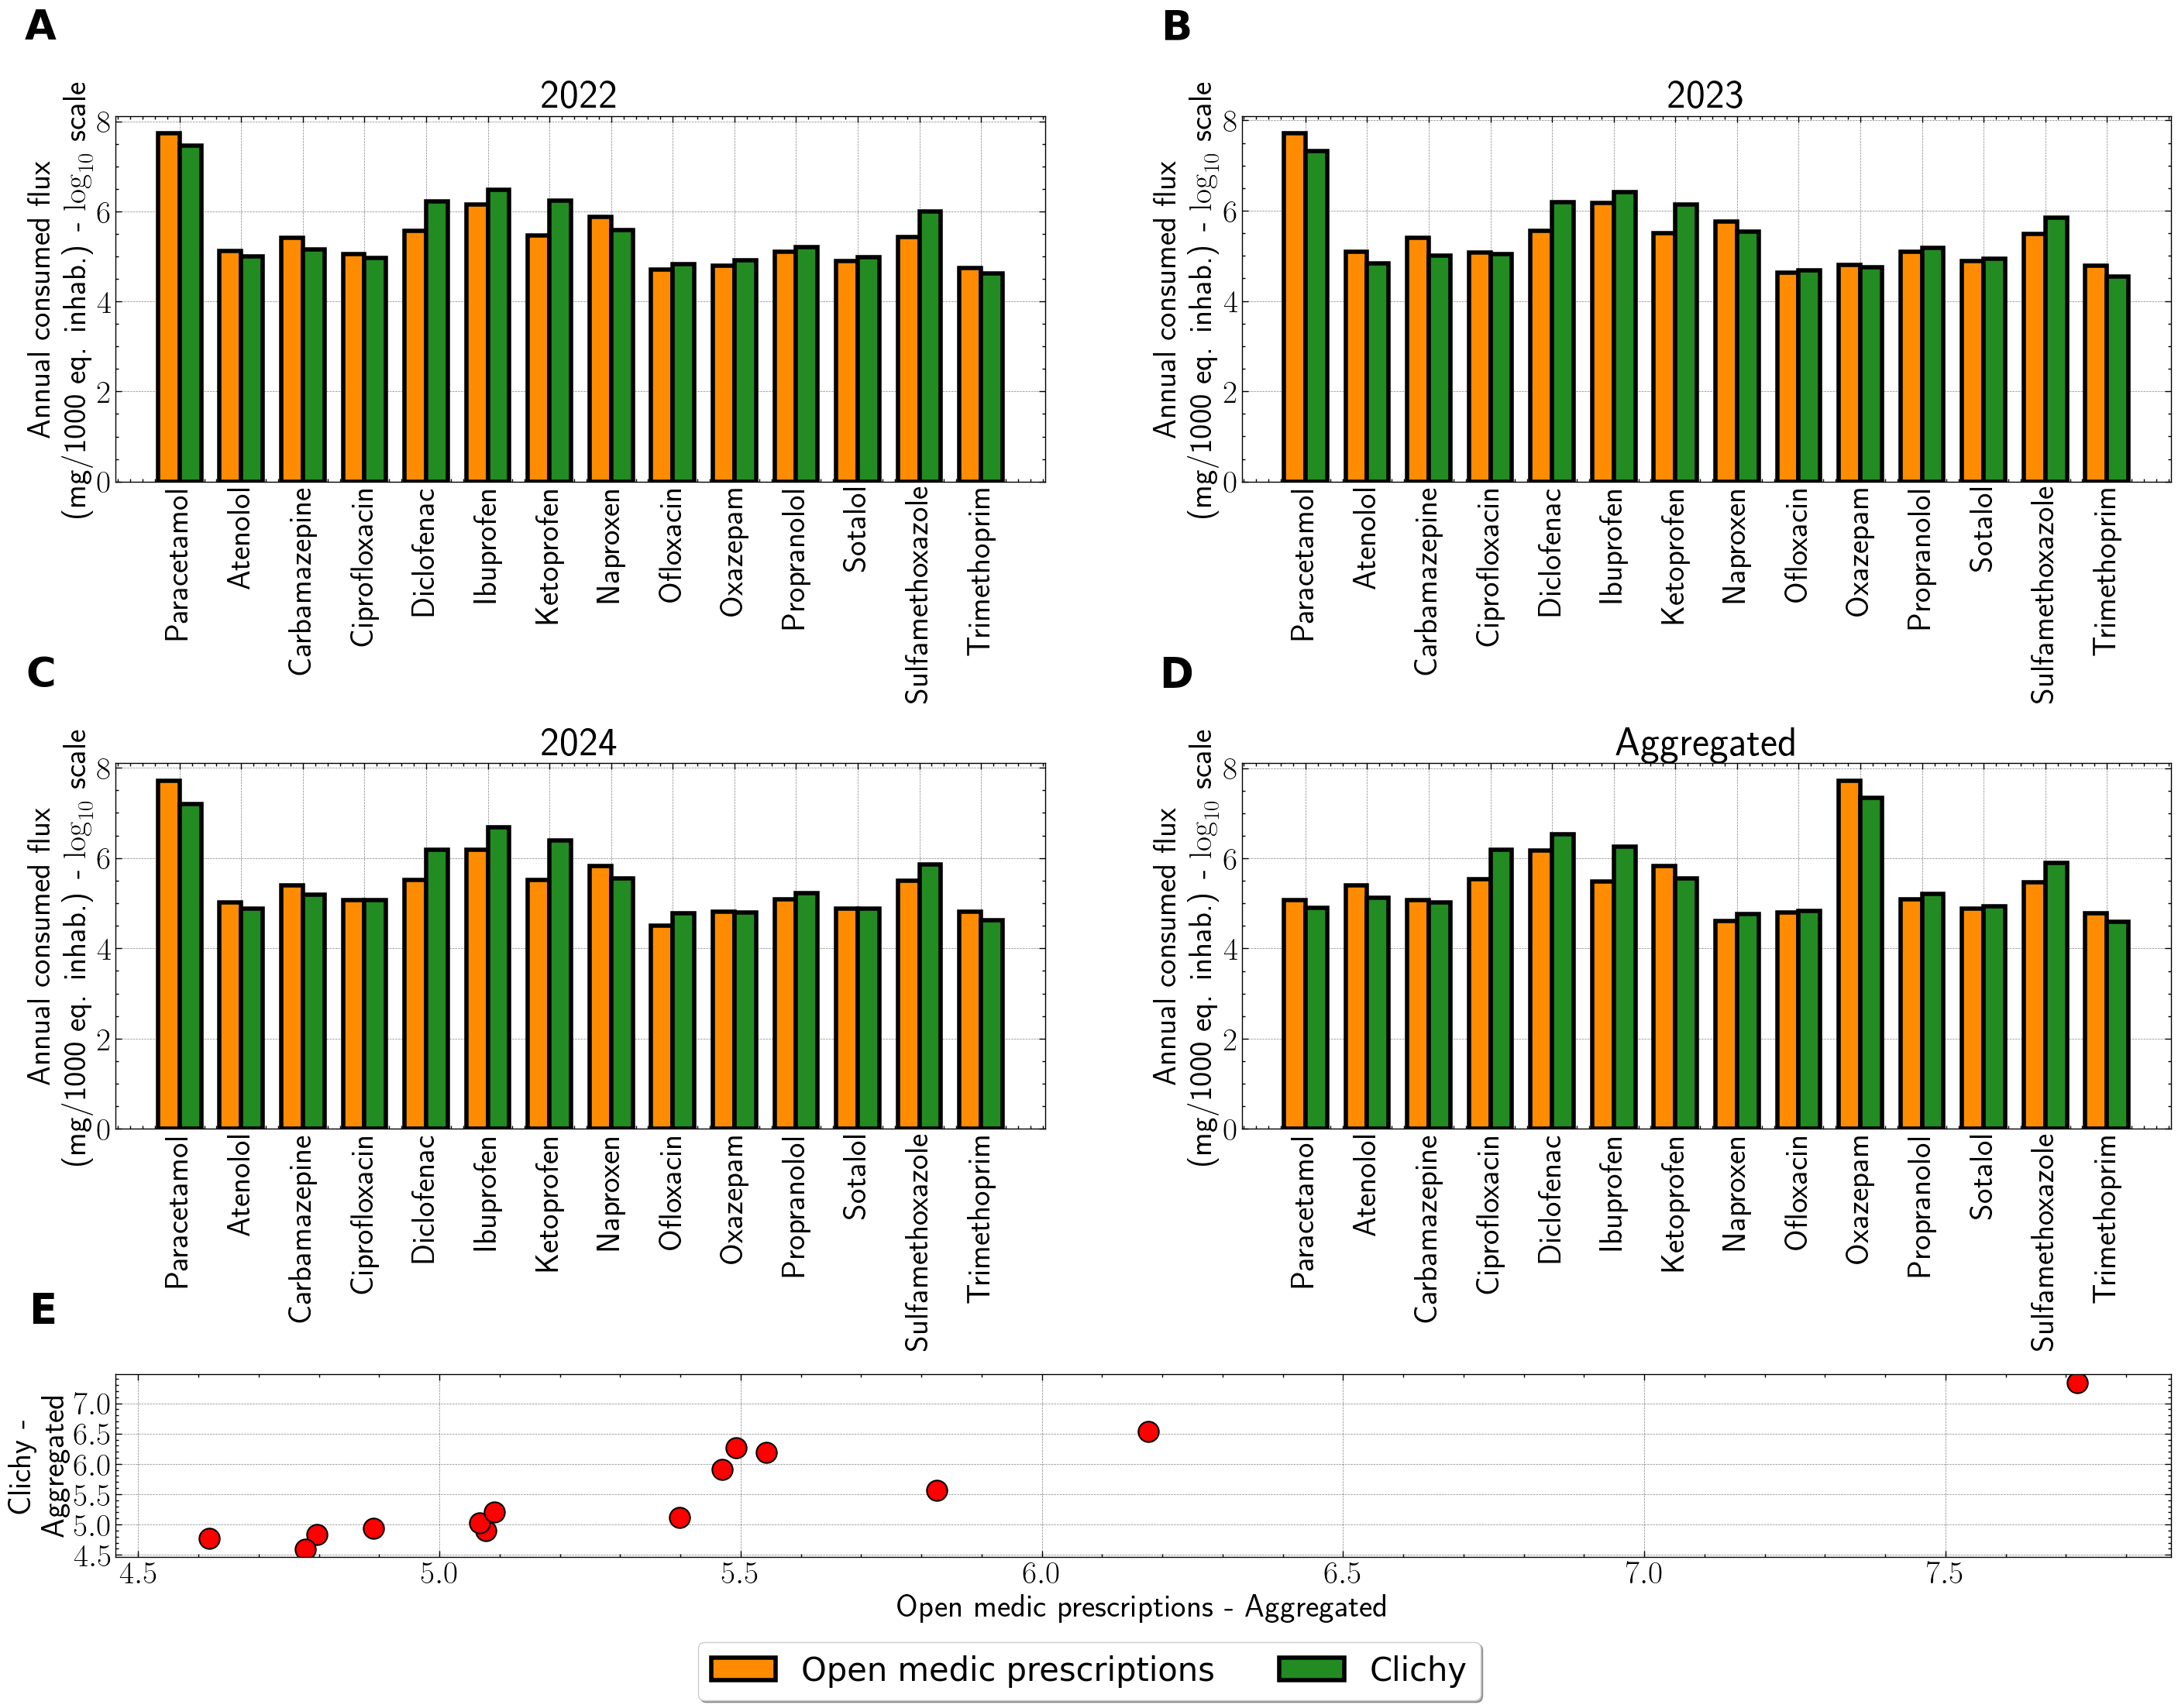

In [26]:
with plt.style.context(['science', 'notebook', 'grid']):

    KEY_SIZE = 38
    LABEL_SIZE = 30
    TICK_SIZE = 30
    TITLE_SIZE = 38
    LEGEND_SIZE = 30
    DATES_SIZE = 18
    figsize = (28, 20) 
    
    plt.rc('axes', labelsize=LABEL_SIZE)
    plt.rc('xtick', labelsize=TICK_SIZE)   
    plt.rc('ytick', labelsize=TICK_SIZE)
    plt.rc('figure', titlesize=TITLE_SIZE)
    plt.rc('legend', fontsize=LEGEND_SIZE)
    plt.rcParams['text.usetex'] = True
    
    fig = plt.figure(figsize=figsize, layout="constrained")
    
    ax_dict = fig.subplot_mosaic(
        """
        AB
        AB
        CD
        CD
        EE
        """,
        gridspec_kw={'wspace': 0.05, 'hspace':0.075}
    )
    
    ### A    
    bars10 = ax_dict['A'].bar(x - width/2, np.log10(values1_by[:,0]), width, label='Open medic prescriptions', linewidth=4, edgecolor='black', color='darkorange')
    bars20 = ax_dict['A'].bar(x + width/2, np.log10(values2_by[:,0]), width, label='Clichy', linewidth=4, edgecolor='black', color='forestgreen')

    bars10 = ax_dict['B'].bar(x - width/2, np.log10(values1_by[:,1]), width, label='Open medic prescriptions', linewidth=4, edgecolor='black', color='darkorange')
    bars20 = ax_dict['B'].bar(x + width/2, np.log10(values2_by[:,1]), width, label='Clichy', linewidth=4, edgecolor='black', color='forestgreen')

    bars10 = ax_dict['C'].bar(x - width/2, np.log10(values1_by[:,2]), width, label='Open medic prescriptions', linewidth=4, edgecolor='black', color='darkorange')
    bars20 = ax_dict['C'].bar(x + width/2, np.log10(values2_by[:,2]), width, label='Clichy', linewidth=4, edgecolor='black', color='forestgreen')

    bars10 = ax_dict['D'].bar(x - width/2, np.log10(values1), width, label='Open medic prescriptions', linewidth=4, edgecolor='black', color='darkorange')
    bars20 = ax_dict['D'].bar(x + width/2, np.log10(values2), width, label='Clichy', linewidth=4, edgecolor='black', color='forestgreen')


    for this_key in ['A', 'B', 'C', 'D']:
        ax_dict[this_key].set_xticks(x)
        ax_dict[this_key].set_xticklabels(en_labels)
        
        ax_dict[this_key].set_ylabel("Annual consumed flux \n (mg/1000 eq. inhab.) - $\log_{10}$ scale")
        ax_dict[this_key].tick_params(axis='x', labelsize=TICK_SIZE, rotation=90)
        ax_dict[this_key].tick_params(axis='y', labelsize=TICK_SIZE)


    ax_dict['A'].set_title('2022', size=TITLE_SIZE)
    ax_dict['B'].set_title('2023', size=TITLE_SIZE)
    ax_dict['C'].set_title('2024', size=TITLE_SIZE)
    ax_dict['D'].set_title('Aggregated', size=TITLE_SIZE)


    ax_dict['E'].scatter(np.log10(values1), np.log10(values2) ,color='red', edgecolor='black', s=360, zorder=1,
                         linewidths=1.5, alpha=1.0, vmin=0, vmax=1)

    ax_dict['E'].set_xlabel('Open medic prescriptions - Aggregated')
    ax_dict['E'].set_ylabel('Clichy - \n Aggregated')

    # Display subplot keys
    plt.rcParams['text.usetex'] = False
    fig.canvas.draw()
    
    # Function to align text with the ylabel of a specific axis
    def align_text_with_ylabel(ax, text, fig, offset=0.175):
        ylabel = ax.yaxis.label
        bbox = ylabel.get_window_extent()
        bbox_fig = fig.transFigure.inverted().transform(bbox)
        ylabel_center_fig_x = (bbox_fig[0, 0] + bbox_fig[1, 0]) / 2
        ylabel_center_fig_y = (bbox_fig[0, 1] + bbox_fig[1, 1]) / 2
        fig.text(ylabel_center_fig_x, ylabel_center_fig_y + offset, text, ha='center', va='center', size=KEY_SIZE, weight='bold')

    # Align text with the ylabels for each subplot
    for n, (key, ax) in enumerate(ax_dict.items()):
        if key != 'E':
            align_text_with_ylabel(ax, key, fig)
        else:
            align_text_with_ylabel(ax, key, fig, offset=0.1)
    
    
    plt.rcParams['text.usetex'] = False
    h1, l1 = ax_dict['A'].get_legend_handles_labels()
    fig.legend(h1, l1, loc='upper center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=3)
    plt.savefig('../outputs/figs/2025-10-24_Normalized_quantities_bar_plot_by_year.pdf', bbox_inches = 'tight')
    plt.savefig('../outputs/figs/2025-10-24_Normalized_quantities_bar_plot_by_year.jpg', bbox_inches = 'tight')


In [27]:
def ape(target, pred):
    num = pred - target
    return int(100*(np.abs(num / target)))

In [28]:
def compute_evolution(value_22, value_24):
    return 100 * (value_24 - value_22) / value_22

In [29]:
def ajouter_virgules(chaine):
    """
    Parcourt une chaîne depuis la fin et ajoute une virgule tous les 3 caractères.
    
    Args:
        chaine (str): La chaîne à formater
        
    Returns:
        str: La chaîne formatée avec des virgules
    """
    # Inverser la chaîne pour parcourir depuis la fin
    chaine_inversee = chaine[::-1]
    
    # Ajouter une virgule tous les 3 caractères
    resultat = []
    for i, char in enumerate(chaine_inversee):
        if i > 0 and i % 3 == 0:
            resultat.append(',')
        resultat.append(char)
    
    # Inverser à nouveau pour obtenir l'ordre correct
    return ''.join(resultat[::-1])

In [30]:
# LaTeX formatting so that I can automate and reduce the reproducing error risk:

for this_molecule in list(siaap_dict_pop_norm_by_year.keys()):
    those_values_WW = siaap_dict_pop_norm_by_year[this_molecule]
    print(en_fr_labels_dict[this_molecule] + ' (WW)', '&', ajouter_virgules(str(int(those_values_WW[0]))), '&', ajouter_virgules(str(int(those_values_WW[1]))), '&', ajouter_virgules(str(int(those_values_WW[2]))), '&', int(compute_evolution(those_values_WW[0], those_values_WW[-1])), '&', molecules_factors[this_molecule], '&', 'TOTO ET AL., XXX', '\\'+'\\')

    those_values_pharma = open_medict_pop_norm_by_year[this_molecule]
    print(en_fr_labels_dict[this_molecule] + ' (Prescriptions)', '&', ajouter_virgules(str(int(those_values_pharma[0]))), '&', ajouter_virgules(str(int(those_values_pharma[1]))), '&', ajouter_virgules(str(int(those_values_pharma[2]))), '&', int(compute_evolution(those_values_pharma[0], those_values_pharma[-1])), '&', '\\'+'\\')

    print('APE (\%)', '&', ape(those_values_pharma[0], those_values_WW[0]), '&', ape(those_values_pharma[1], those_values_WW[1]), '&', ape(those_values_pharma[2], those_values_WW[2]), '&', '\\'+'\\')
    print('\midrule')

Atenolol (WW) & 98,177 & 66,806 & 74,965 & -23 & 1.4 & TOTO ET AL., XXX \\
Atenolol (Prescriptions) & 129,340 & 123,080 & 105,722 & -18 & \\
APE (\%) & 24 & 45 & 29 & \\
\midrule
Carbamazepine (WW) & 142,918 & 100,784 & 152,489 & 6 & 7.1 & TOTO ET AL., XXX \\
Carbamazepine (Prescriptions) & 256,738 & 248,762 & 246,238 & -4 & \\
APE (\%) & 44 & 59 & 38 & \\
\midrule
Ciprofloxacin (WW) & 91,818 & 108,281 & 115,378 & 25 & 2.0 & TOTO ET AL., XXX \\
Ciprofloxacin (Prescriptions) & 112,710 & 118,561 & 118,520 & 5 & \\
APE (\%) & 18 & 8 & 2 & \\
\midrule
Diclofenac (WW) & 1,638,297 & 1,515,664 & 1,525,686 & -6 & 17.2 & TOTO ET AL., XXX \\
Diclofenac (Prescriptions) & 362,590 & 362,760 & 321,242 & -11 & \\
APE (\%) & 351 & 317 & 374 & \\
\midrule
Ibuprofen (WW) & 2,971,766 & 2,604,814 & 4,835,956 & 62 & 9.4 & TOTO ET AL., XXX \\
Ibuprofen (Prescriptions) & 1,444,144 & 1,514,466 & 1,549,824 & 7 & \\
APE (\%) & 105 & 71 & 212 & \\
\midrule
Ketoprofen (WW) & 1,706,243 & 1,358,152 & 2,439,008 & 42

In [31]:
np.corrcoef(np.log10(values1), np.log10(values2))

array([[1.        , 0.90308094],
       [0.90308094, 1.        ]])